In [1]:
print "ready"

ready


In [1]:
import pandas as pd
import numpy as np
from pandas import DataFrame
from collections import defaultdict
from collections import Counter
from datetime import datetime
import time
import matplotlib
import matplotlib.pyplot as plt
import pprint
import os
import reader
import re
import pprint
import seaborn as sns

In [2]:
path = 'E:/SUBJECTS/497 MATH S17 PSP--/Data/'
interpath= 'E:/SUBJECTS/497 MATH S17 PSP--/Data/intermediate/'

In [3]:
sp=pd.read_csv(interpath+"single_person_all3.csv")
del sp["Unnamed: 0"]
print sp.shape
print sp.columns
sp.head()

(16087, 32)
Index([u'Enc_Nbr', u'Person_Nbr', u'Smoking_Status', u'Primary_Payer', u'A1C',
       u'BMI', u'Glucose', u'BP_Systolic', u'BP_Diastolic', u'ICD',
       u'OD_Macula1_Finding', u'OD_Macula1_Modifer', u'OD_Macula2_Finding',
       u'OD_Macula2_Modifer', u'OD_Macula3_Finding', u'OS_Macula1_Finding',
       u'OS_Macula1_Modifer', u'OS_Macula2_Finding', u'OS_Macula2_Modifer',
       u'OS_Macula3_Finding', u'OD_SL_LENS', u'OS_SL_LENS', u'Enc_Yr_sl',
       u'Age', u'Zipn', u'Gender', u'Racen', u'Relation', u'Code',
       u'Family_History', u'DM', u'G'],
      dtype='object')


,Enc_Nbr,Person_Nbr,Smoking_Status,Primary_Payer,A1C,BMI,Glucose,BP_Systolic,BP_Diastolic,ICD,...,Enc_Yr_sl,Age,Zipn,Gender,Racen,Relation,Code,Family_History,DM,G
0,123227.0,33.0,Never smoker,Premier Vision Plan,8.0,0.00,130.0,59.0,39.0,"367.4,373.00,250.00",...,2012-10-16,68,60616.0,F,Black or African American,Parents;Siblings,"160347007.0,160274005.0,160274005.0,160267000....","Glaucoma,No history of Diabetes mellitus,No hi...",2,1
1,14361139.0,327.0,Never smoker,Medicare,0.0,0.00,121.0,0.0,0.0,"365.02,250.00,362.81,365.02,250.00,365.02,250....",...,2016-10-22,61,60652.0,M,Other,Parents;Relatives,"416855002.0,160274005.0,160267000.0,160267000....","Diabetes,No history of Diabetes mellitus,No hi...",1,2
2,11783809.0,335.0,Former smoker,Blue Shield Of Illinois PPO,0.0,0.00,103.0,0.0,0.0,"366.19,374.87,250.00,250.00,366.19,250.00,366....",...,2016-10-05,83,60637.0,F,Other,Parents,"416855002.0,275134007.0,160357008.0,160267000....","Diabetes,Arthritis,HBP,No history of Glaucoma,...",1,2
3,6074701.0,1515.0,Never smoker,VOHHA,0.0,0.00,200.0,130.0,80.0,"H10.45,H35.40,H04.123,H52.4,nan",...,2016-10-10,67,60615.0,F,Other,Parents,"416855002.0,160267000.0,160274005.0,160267000.0;","Diabetes,No history of Glaucoma,No history of ...",1,2
4,8583237.0,1519.0,Former smoker,Opticare CountyCare,0.0,37.11,118.0,110.0,80.0,"367.4,365.01,365.01,367.4,367.4",...,2015-12-19,61,60615.0,F,Other,Parents;Siblings,"160274005.0,160267000.0,160274005.0,160267000....","No history of Diabetes mellitus,No history of ...",2,2


Percent of Null values in quantitative columns

In [27]:
quantitive_columns1 = sp.select_dtypes(include=[np.number]).columns
print len(quantitive_columns1)
miss_quant_null=sp[quantitive_columns1].isnull().sum(axis=0)/sp.shape[0]
miss_quant_null.sort_values(ascending=False)

24


OD_Macula4_Finding     1.000000
OS_Macula2_Location    1.000000
OD_Macula1_Location    1.000000
OD_Macula2_Location    1.000000
OD_Macula3_Location    1.000000
OD_Macula4_Modifer     1.000000
OD_Macula4_Location    1.000000
OS_Macula1_Location    1.000000
OS_Macula3_Location    1.000000
OS_Macula4_Modifer     1.000000
OS_Macula4_Location    1.000000
Enc_Nbr_mac            0.042146
Enc_Nbr_sl             0.018897
Zipn                   0.000062
Glucose                0.000000
A1C                    0.000000
Person_Nbr             0.000000
BMI                    0.000000
G                      0.000000
BP_Systolic            0.000000
BP_Diastolic           0.000000
DM                     0.000000
Age                    0.000000
Enc_Nbr                0.000000
dtype: float64

Percent of Zero values in quantitative columns

In [28]:
quantitive_columns2 = sp.select_dtypes(include=[np.number]).columns
print len(quantitive_columns2)
miss_quant_zero=sp[quantitive_columns2][sp == 0].count(axis=0)/sp.shape[0]
miss_quant_zero.sort_values(ascending=False)

24


A1C                    0.669733
BMI                    0.533226
Glucose                0.316715
BP_Diastolic           0.089202
BP_Systolic            0.089140
G                      0.000000
DM                     0.000000
Person_Nbr             0.000000
Enc_Nbr_mac            0.000000
OD_Macula1_Location    0.000000
OD_Macula2_Location    0.000000
OD_Macula3_Location    0.000000
OD_Macula4_Finding     0.000000
OD_Macula4_Modifer     0.000000
OD_Macula4_Location    0.000000
OS_Macula1_Location    0.000000
OS_Macula2_Location    0.000000
OS_Macula3_Location    0.000000
OS_Macula4_Modifer     0.000000
OS_Macula4_Location    0.000000
Enc_Nbr_sl             0.000000
Age                    0.000000
Zipn                   0.000000
Enc_Nbr                0.000000
dtype: float64

Percent of Null values in qualitative columns

In [29]:
qualitative_columns1 = sp.select_dtypes(include=[object]).columns
print len(qualitative_columns1)
miss_qual1=sp[qualitative_columns1].isnull().sum(axis=0)/sp.shape[0]
miss_qual1.sort_values(ascending=False)

27


OS_Macula4_Finding    0.999938
OD_Macula3_Modifer    0.999503
OS_Macula3_Modifer    0.999503
OD_Macula3_Finding    0.992105
OS_Macula3_Finding    0.991670
OS_Macula2_Modifer    0.976005
OD_Macula2_Modifer    0.975881
OS_Macula1_Modifer    0.959408
OD_Macula1_Modifer    0.958351
OS_Macula2_Finding    0.819979
OD_Macula2_Finding    0.816746
Code                  0.135513
Family_History        0.135513
Relation              0.135513
OS_Macula1_Finding    0.061230
OD_Macula1_Finding    0.042146
Enc_Yr_mac            0.042146
OS_SL_LENS            0.027662
OD_SL_LENS            0.018897
Enc_Yr_sl             0.018897
Racen                 0.013676
ICD                   0.002424
Gender                0.000000
Enc_Time              0.000000
Enc_Yr                0.000000
Primary_Payer         0.000000
Smoking_Status        0.000000
dtype: float64

Removing the quantitative columns with complete Null values

In [38]:
del sp['Enc_Yr']
del sp['Enc_Time']
del sp['Enc_Nbr_mac']
del sp['Enc_Yr_mac']
del sp["OD_Macula1_Location"]
del sp["OD_Macula2_Location"]
del sp["OD_Macula3_Location"]
del sp["OD_Macula4_Finding"]
del sp["OD_Macula4_Modifer"]
del sp["OD_Macula4_Location"]
del sp["OS_Macula1_Location"]
del sp["OS_Macula2_Location"]
del sp["OS_Macula3_Location"]
del sp["OS_Macula4_Location"]
del sp["OS_Macula4_Modifer"]
del sp["Enc_Nbr_sl"]
print sp.shape
sp.columns

(16087, 35)


Index([u'Enc_Nbr', u'Person_Nbr', u'Smoking_Status', u'Primary_Payer', u'A1C',
       u'BMI', u'Glucose', u'BP_Systolic', u'BP_Diastolic', u'ICD',
       u'OD_Macula1_Finding', u'OD_Macula1_Modifer', u'OD_Macula2_Finding',
       u'OD_Macula2_Modifer', u'OD_Macula3_Finding', u'OD_Macula3_Modifer',
       u'OS_Macula1_Finding', u'OS_Macula1_Modifer', u'OS_Macula2_Finding',
       u'OS_Macula2_Modifer', u'OS_Macula3_Finding', u'OS_Macula3_Modifer',
       u'OS_Macula4_Finding', u'OD_SL_LENS', u'OS_SL_LENS', u'Enc_Yr_sl',
       u'Age', u'Zipn', u'Gender', u'Racen', u'Relation', u'Code',
       u'Family_History', u'DM', u'G'],
      dtype='object')

In [31]:
quantitive_columns3 = sp.select_dtypes(include=[np.number]).columns
print len(quantitive_columns3)
miss_quant=sp[quantitive_columns3][sp == 0].count(axis=0)/sp.shape[0]
miss_quant.sort_values(ascending=False)

11


A1C             0.669733
BMI             0.533226
Glucose         0.316715
BP_Diastolic    0.089202
BP_Systolic     0.089140
G               0.000000
DM              0.000000
Zipn            0.000000
Age             0.000000
Person_Nbr      0.000000
Enc_Nbr         0.000000
dtype: float64

Understanding the summary statistics,distributions and the correlations for quantitative columns

In [33]:
print quantitive_columns3
qc= quantitive_columns3[2:8]
print qc

Index([u'Enc_Nbr', u'Person_Nbr', u'A1C', u'BMI', u'Glucose', u'BP_Systolic',
       u'BP_Diastolic', u'Age', u'Zipn', u'DM', u'G'],
      dtype='object')
Index([u'A1C', u'BMI', u'Glucose', u'BP_Systolic', u'BP_Diastolic', u'Age'], dtype='object')


In [34]:
sp.describe()

,Enc_Nbr,Person_Nbr,A1C,BMI,Glucose,BP_Systolic,BP_Diastolic,Age,Zipn,DM,G
count,1.608700e+04,1.608700e+04,16087.000000,16087.000000,16087.000000,16087.000000,16087.000000,16087.000000,16086.000000,16087.000000,16087.000000
mean,8.406387e+06,5.225861e+05,1.575705,9.711931,65.672348,86.232002,50.573606,61.675079,60481.825190,3.850687,4.713806
std,4.826593e+06,3.017765e+05,2.754908,13.367181,65.783622,48.614203,28.967937,15.260425,1965.607042,3.515276,3.518590
min,4.091000e+03,3.300000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,606.000000,1.000000,1.000000
25%,4.236490e+06,2.627050e+05,0.000000,0.000000,0.000000,49.720779,28.250000,53.000000,NaN,1.000000,2.000000
50%,8.434603e+06,5.184870e+05,0.000000,0.000000,55.500000,85.000000,49.000000,62.000000,NaN,2.000000,2.000000
75%,1.253775e+07,7.821745e+05,2.400000,17.165000,109.000000,128.000000,77.000000,72.000000,NaN,9.000000,9.000000
max,1.677692e+07,1.048528e+06,17.000000,82.300000,1200.000000,240.000000,130.000000,115.000000,97838.000000,9.000000,9.000000


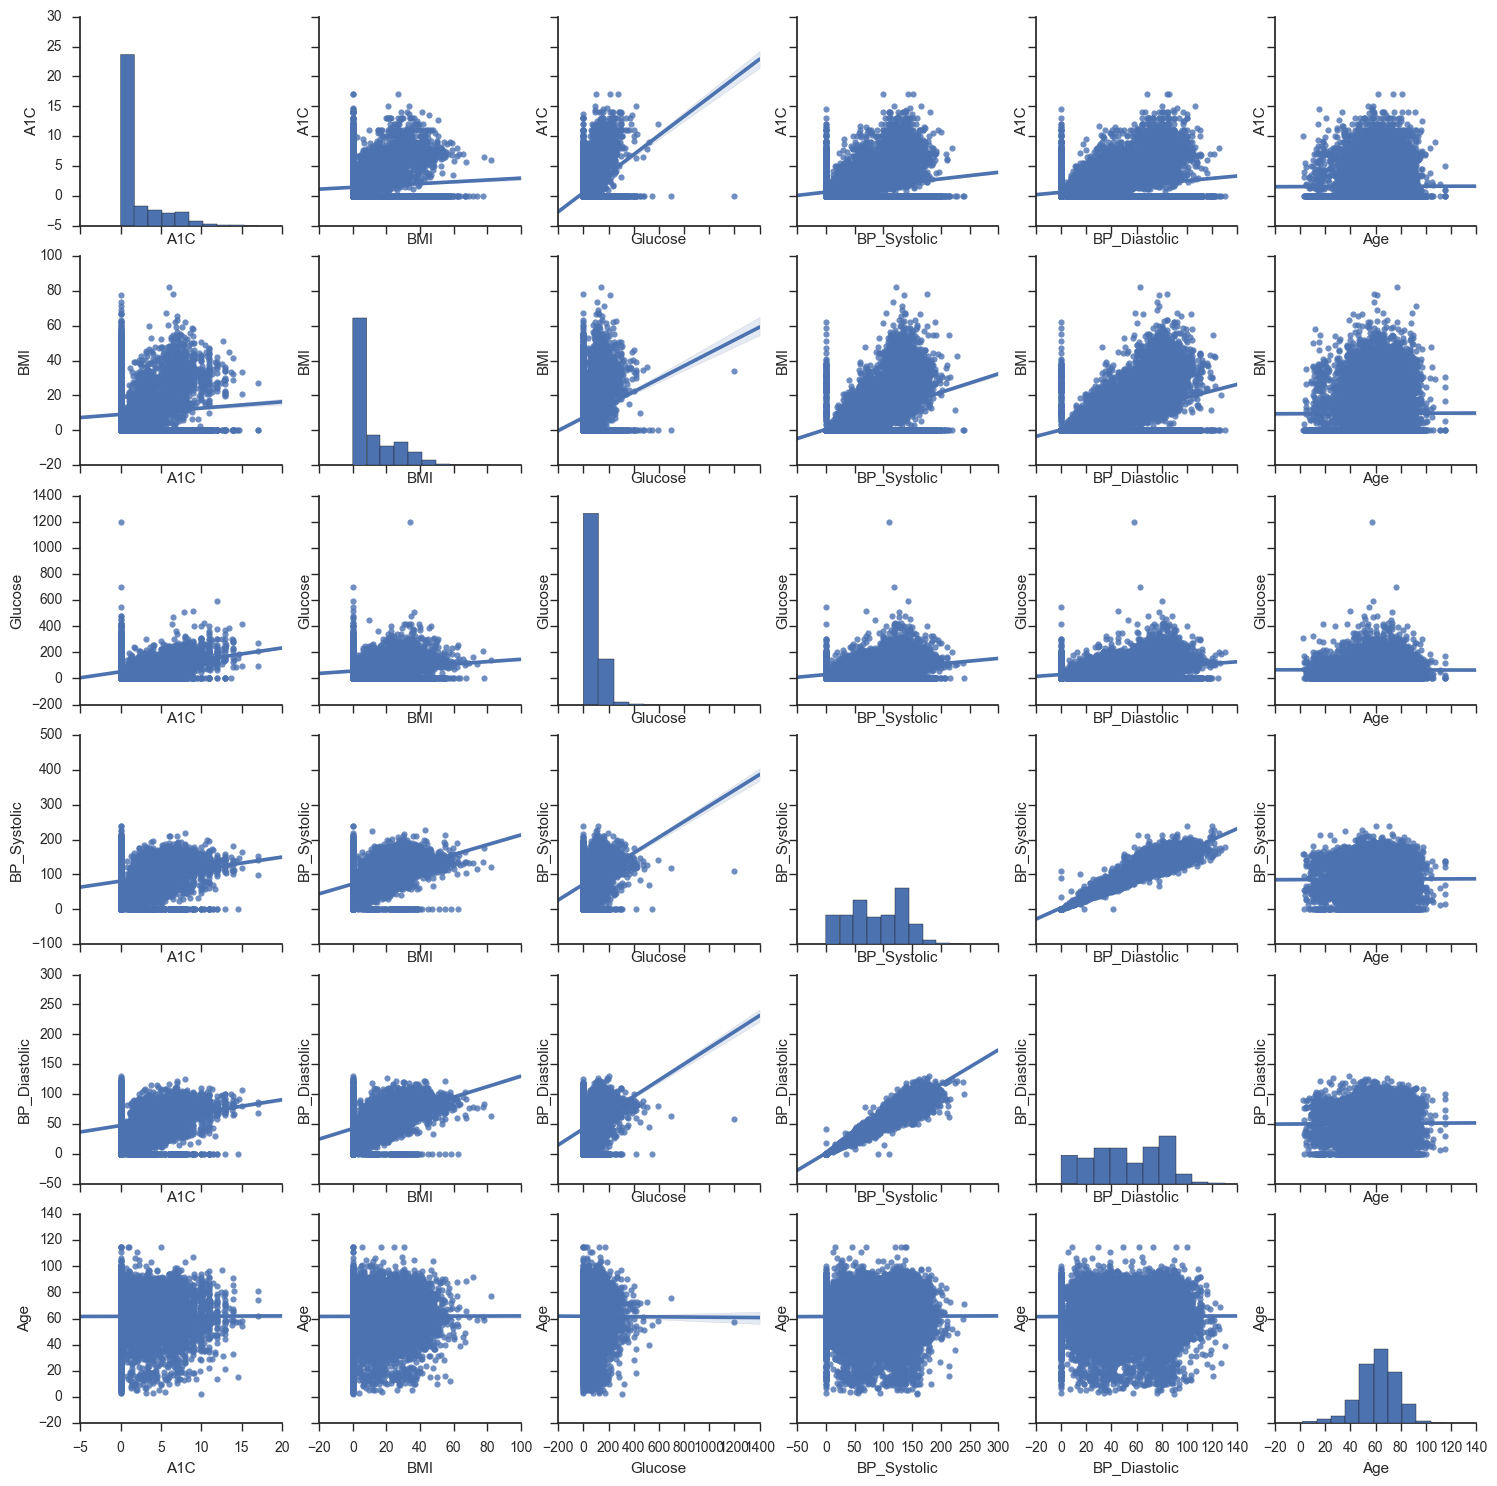

In [49]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(sp[qc],kind="reg")

xlabels,ylabels = [],[]
for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)
for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])

sns.plt.show()

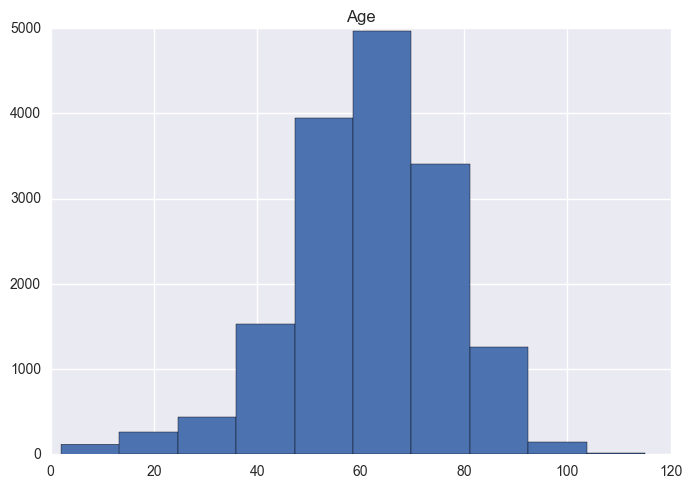

In [10]:
#np.histogram( sp.Age)
import matplotlib.pyplot as plt
plt.hist(sp.Age)  # plt.hist passes it's arguments to np.histogram
plt.title("Age")
plt.show()

In [35]:
qualitative_columns2 = sp.select_dtypes(include=[object]).columns
print len(qualitative_columns2)
miss_qual2=sp[qualitative_columns2].isnull().sum()/sp.shape[0]
miss_qual2.sort_values(ascending=False)

24


OS_Macula4_Finding    0.999938
OD_Macula3_Modifer    0.999503
OS_Macula3_Modifer    0.999503
OD_Macula3_Finding    0.992105
OS_Macula3_Finding    0.991670
OS_Macula2_Modifer    0.976005
OD_Macula2_Modifer    0.975881
OS_Macula1_Modifer    0.959408
OD_Macula1_Modifer    0.958351
OS_Macula2_Finding    0.819979
OD_Macula2_Finding    0.816746
Code                  0.135513
Family_History        0.135513
Relation              0.135513
OS_Macula1_Finding    0.061230
OD_Macula1_Finding    0.042146
OS_SL_LENS            0.027662
OD_SL_LENS            0.018897
Enc_Yr_sl             0.018897
Racen                 0.013676
ICD                   0.002424
Gender                0.000000
Primary_Payer         0.000000
Smoking_Status        0.000000
dtype: float64

Removing the the columns with 99.9% null values 

In [39]:
del sp["OS_Macula4_Finding"]
del sp["OD_Macula3_Modifer"]
del sp["OS_Macula3_Modifer"]
sp.shape

(16087, 32)

Plotting categorical variables

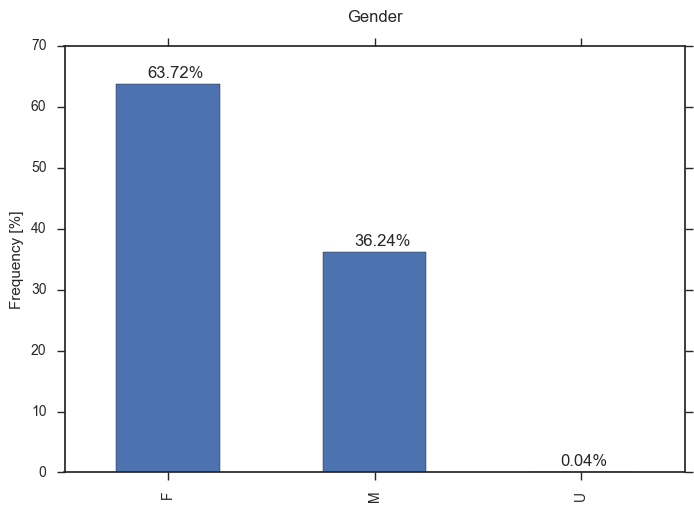

In [84]:
ax = (sp.Gender.value_counts()/len(sp)*100).plot(kind="bar")
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title('Gender\n')
plt.ylabel('Frequency [%]')
plt.show()

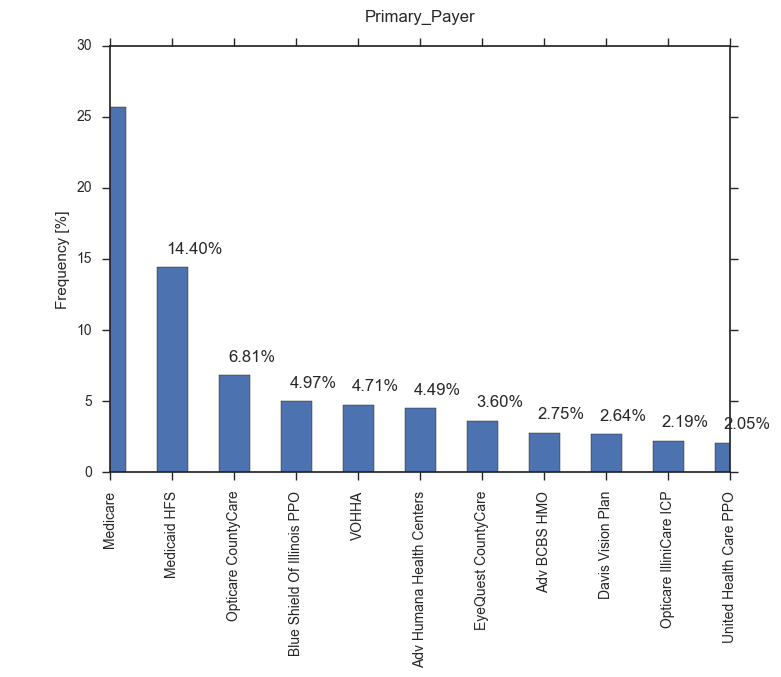

In [87]:
ax = (sp.Primary_Payer.value_counts()/len(sp)*100).plot(kind="bar",rot=90)
ax.set_xlim([0, 10])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title('Primary_Payer\n')
plt.ylabel('Frequency [%]')
plt.show()

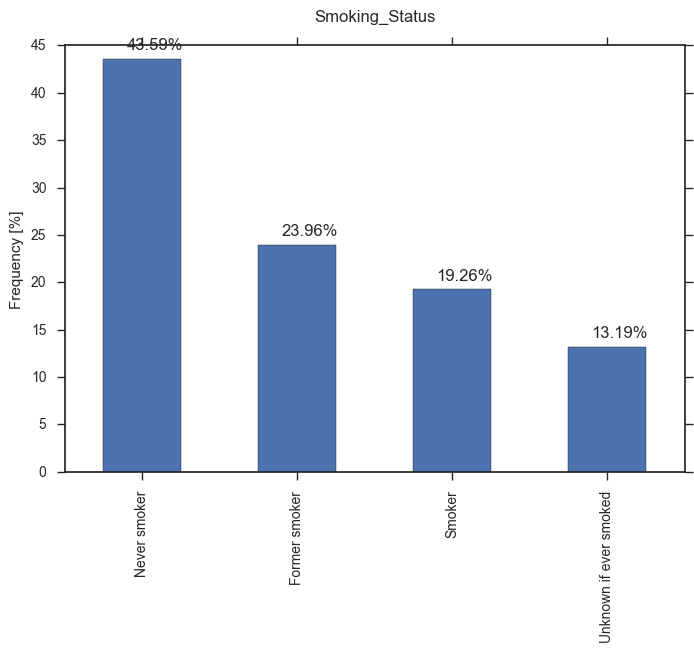

In [96]:
ax = (sp.Smoking_Status.value_counts()/len(sp)*100).plot(kind="bar")
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title('Smoking_Status\n')
plt.ylabel('Frequency [%]')
plt.show()

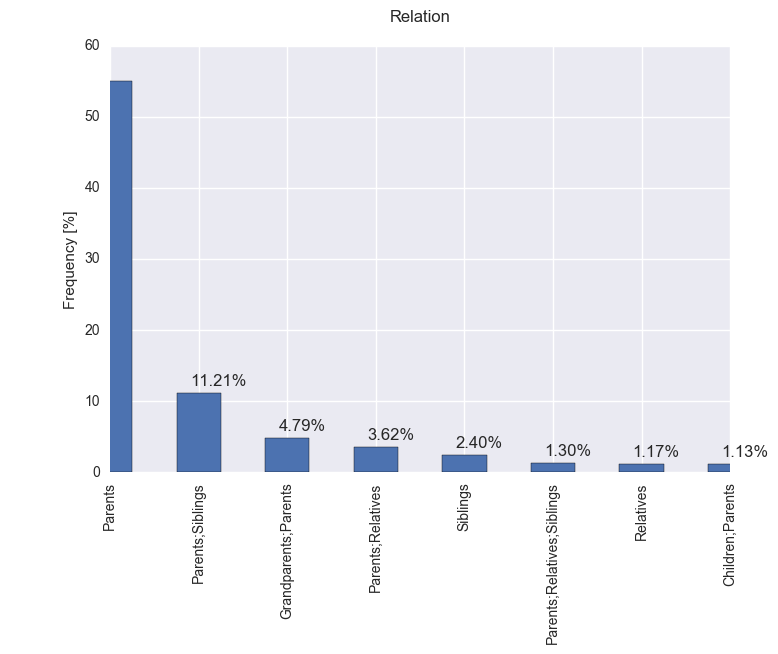

In [8]:
ax = (sp.Relation.value_counts()/len(sp)*100).plot(kind="bar")
ax.set_xlim([0, 7])
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title('Relation\n')
plt.ylabel('Frequency [%]')
plt.show()

In [12]:
sp = sp.replace(np.nan, 'Unknown')
print len(sp.Racen.unique())
sp.Racen.unique()

5


array(['Black or African American', 'Other', 'Hispanic or Latino',
       'Unknown', 'White'], dtype=object)

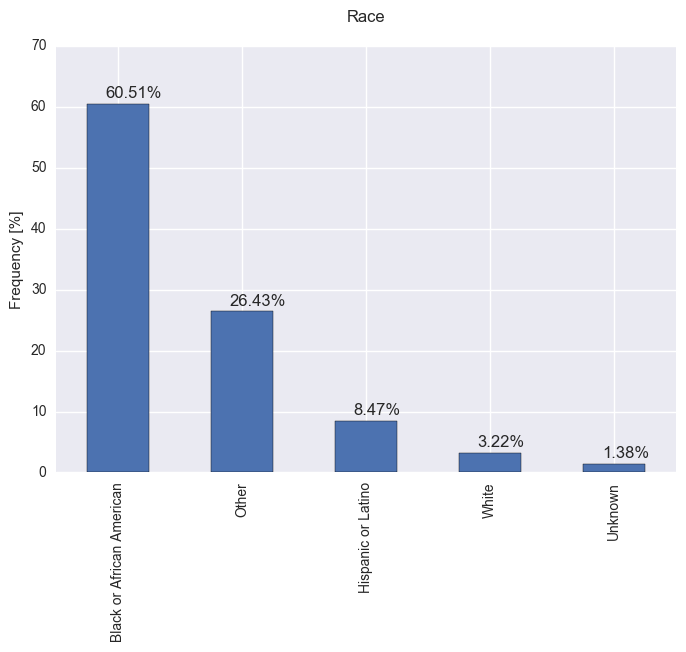

In [13]:
ax = (sp.Racen.value_counts()/len(sp)*100).plot(kind="bar",rot=90)
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.title('Race\n')
plt.ylabel('Frequency [%]')
plt.show()

In [46]:
sp.to_csv("single_person_all3.csv")

Imputing values for missing values 

In [17]:
sp=pd.read_csv(interpath+"single_person_all3.csv")
del sp["Unnamed: 0"]
print sp.shape
print sp.columns
sp.head()

(16087, 32)
Index([u'Enc_Nbr', u'Person_Nbr', u'Smoking_Status', u'Primary_Payer', u'A1C',
       u'BMI', u'Glucose', u'BP_Systolic', u'BP_Diastolic', u'ICD',
       u'OD_Macula1_Finding', u'OD_Macula1_Modifer', u'OD_Macula2_Finding',
       u'OD_Macula2_Modifer', u'OD_Macula3_Finding', u'OS_Macula1_Finding',
       u'OS_Macula1_Modifer', u'OS_Macula2_Finding', u'OS_Macula2_Modifer',
       u'OS_Macula3_Finding', u'OD_SL_LENS', u'OS_SL_LENS', u'Enc_Yr_sl',
       u'Age', u'Zipn', u'Gender', u'Racen', u'Relation', u'Code',
       u'Family_History', u'DM', u'G'],
      dtype='object')


,Enc_Nbr,Person_Nbr,Smoking_Status,Primary_Payer,A1C,BMI,Glucose,BP_Systolic,BP_Diastolic,ICD,...,Enc_Yr_sl,Age,Zipn,Gender,Racen,Relation,Code,Family_History,DM,G
0,123227.0,33.0,Never smoker,Premier Vision Plan,8.0,0.00,130.0,59.0,39.0,"367.4,373.00,250.00",...,2012-10-16,68,60616.0,F,Black or African American,Parents;Siblings,"160347007.0,160274005.0,160274005.0,160267000....","Glaucoma,No history of Diabetes mellitus,No hi...",2,1
1,14361139.0,327.0,Never smoker,Medicare,0.0,0.00,121.0,0.0,0.0,"365.02,250.00,362.81,365.02,250.00,365.02,250....",...,2016-10-22,61,60652.0,M,Other,Parents;Relatives,"416855002.0,160274005.0,160267000.0,160267000....","Diabetes,No history of Diabetes mellitus,No hi...",1,2
2,11783809.0,335.0,Former smoker,Blue Shield Of Illinois PPO,0.0,0.00,103.0,0.0,0.0,"366.19,374.87,250.00,250.00,366.19,250.00,366....",...,2016-10-05,83,60637.0,F,Other,Parents,"416855002.0,275134007.0,160357008.0,160267000....","Diabetes,Arthritis,HBP,No history of Glaucoma,...",1,2
3,6074701.0,1515.0,Never smoker,VOHHA,0.0,0.00,200.0,130.0,80.0,"H10.45,H35.40,H04.123,H52.4,nan",...,2016-10-10,67,60615.0,F,Other,Parents,"416855002.0,160267000.0,160274005.0,160267000.0;","Diabetes,No history of Glaucoma,No history of ...",1,2
4,8583237.0,1519.0,Former smoker,Opticare CountyCare,0.0,37.11,118.0,110.0,80.0,"367.4,365.01,365.01,367.4,367.4",...,2015-12-19,61,60615.0,F,Other,Parents;Siblings,"160274005.0,160267000.0,160274005.0,160267000....","No history of Diabetes mellitus,No history of ...",2,2


In [18]:
sp1=sp.copy()

In [19]:
age_group = np.array([sp1.Age.quantile(1.0/6*i) for i in range(1,7)])
sp1['Age_group_numeric']=sp1.Age.apply(lambda x: sum(age_group<x)+1)
age_group_dict = {1: '(18, 48]', 2: '(49, 55]', 3: '(56, 60]', 4: '(61, 66]', 5: '(67, 74]', 6: '(75, 114]'}
sp1['Age_group'] = sp1.Age_group_numeric.apply(lambda x: age_group_dict.get(x))
sp1.groupby('Age_group').apply(lambda x: x.shape[0])

Age_group
(18, 48]     2821
(49, 55]     2550
(56, 60]     2937
(61, 66]     2582
(67, 74]     2554
(75, 114]    2643
dtype: int64

In [20]:
quantitive_columns=['A1C', 'BMI', 'Glucose', 'BP_Diastolic', 'BP_Systolic']
sp1.groupby('Age_group').apply(lambda x: x[quantitive_columns][sp1 == 0].count(axis=0)/x.shape[0])

,A1C,BMI,Glucose,BP_Diastolic,BP_Systolic
Age_group,,,,,
"(18, 48]",0.668912,0.550160,0.326125,0.092875,0.092875
"(49, 55]",0.682745,0.513725,0.305098,0.086667,0.086275
"(56, 60]",0.668369,0.540347,0.319033,0.096357,0.096357
"(61, 66]",0.647947,0.542990,0.309837,0.086754,0.087142
"(67, 74]",0.678543,0.519577,0.312451,0.082616,0.082224
"(75, 114]",0.672342,0.529701,0.326145,0.088536,0.088536


In [21]:
for column in quantitive_columns:
    mean_value = sp1.groupby('Age_group').apply(
        lambda x: x[column][x[column]!=0].mean())
    missing_index = sp1.groupby('Age_group').apply(
        lambda x: x[column][x[column]==0])
    for i in mean_value.index.to_series().tolist():
        if i in missing_index.index:
            sp1.set_value(missing_index[i].index, column, mean_value[i])

In [22]:
print sp1.shape
print sp1.columns
sp1.head()

(16087, 34)
Index([u'Enc_Nbr', u'Person_Nbr', u'Smoking_Status', u'Primary_Payer', u'A1C',
       u'BMI', u'Glucose', u'BP_Systolic', u'BP_Diastolic', u'ICD',
       u'OD_Macula1_Finding', u'OD_Macula1_Modifer', u'OD_Macula2_Finding',
       u'OD_Macula2_Modifer', u'OD_Macula3_Finding', u'OS_Macula1_Finding',
       u'OS_Macula1_Modifer', u'OS_Macula2_Finding', u'OS_Macula2_Modifer',
       u'OS_Macula3_Finding', u'OD_SL_LENS', u'OS_SL_LENS', u'Enc_Yr_sl',
       u'Age', u'Zipn', u'Gender', u'Racen', u'Relation', u'Code',
       u'Family_History', u'DM', u'G', u'Age_group_numeric', u'Age_group'],
      dtype='object')


,Enc_Nbr,Person_Nbr,Smoking_Status,Primary_Payer,A1C,BMI,Glucose,BP_Systolic,BP_Diastolic,ICD,...,Zipn,Gender,Racen,Relation,Code,Family_History,DM,G,Age_group_numeric,Age_group
0,123227.0,33.0,Never smoker,Premier Vision Plan,8.000000,20.879103,130.0,59.000000,39.000000,"367.4,373.00,250.00",...,60616.0,F,Black or African American,Parents;Siblings,"160347007.0,160274005.0,160274005.0,160267000....","Glaucoma,No history of Diabetes mellitus,No hi...",2,1,4,"(61, 66]"
1,14361139.0,327.0,Never smoker,Medicare,4.894269,21.150235,121.0,96.075853,56.201987,"365.02,250.00,362.81,365.02,250.00,365.02,250....",...,60652.0,M,Other,Parents;Relatives,"416855002.0,160274005.0,160267000.0,160267000....","Diabetes,No history of Diabetes mellitus,No hi...",1,2,3,"(56, 60]"
2,11783809.0,335.0,Former smoker,Blue Shield Of Illinois PPO,4.791745,20.833580,103.0,93.981033,55.030618,"366.19,374.87,250.00,250.00,366.19,250.00,366....",...,60637.0,F,Other,Parents,"416855002.0,275134007.0,160357008.0,160267000....","Diabetes,Arthritis,HBP,No history of Glaucoma,...",1,2,6,"(75, 114]"
3,6074701.0,1515.0,Never smoker,VOHHA,4.694850,20.879103,200.0,130.000000,80.000000,"H10.45,H35.40,H04.123,H52.4,nan",...,60615.0,F,Other,Parents,"416855002.0,160267000.0,160274005.0,160267000.0;","Diabetes,No history of Glaucoma,No history of ...",1,2,4,"(61, 66]"
4,8583237.0,1519.0,Former smoker,Opticare CountyCare,4.894269,37.110000,118.0,110.000000,80.000000,"367.4,365.01,365.01,367.4,367.4",...,60615.0,F,Other,Parents;Siblings,"160274005.0,160267000.0,160274005.0,160267000....","No history of Diabetes mellitus,No history of ...",2,2,3,"(56, 60]"


In [23]:
sp1.to_csv("single_person_all4.csv")

In [12]:
sp1=pd.read_csv(interpath+"single_person_all4.csv")
del sp1["Unnamed: 0"]
print sp1.shape
print sp1.columns
sp1.head()

(16087, 34)
Index([u'Enc_Nbr', u'Person_Nbr', u'Smoking_Status', u'Primary_Payer', u'A1C',
       u'BMI', u'Glucose', u'BP_Systolic', u'BP_Diastolic', u'ICD',
       u'OD_Macula1_Finding', u'OD_Macula1_Modifer', u'OD_Macula2_Finding',
       u'OD_Macula2_Modifer', u'OD_Macula3_Finding', u'OS_Macula1_Finding',
       u'OS_Macula1_Modifer', u'OS_Macula2_Finding', u'OS_Macula2_Modifer',
       u'OS_Macula3_Finding', u'OD_SL_LENS', u'OS_SL_LENS', u'Enc_Yr_sl',
       u'Age', u'Zipn', u'Gender', u'Racen', u'Relation', u'Code',
       u'Family_History', u'DM', u'G', u'Age_group_numeric', u'Age_group'],
      dtype='object')


,Enc_Nbr,Person_Nbr,Smoking_Status,Primary_Payer,A1C,BMI,Glucose,BP_Systolic,BP_Diastolic,ICD,...,Zipn,Gender,Racen,Relation,Code,Family_History,DM,G,Age_group_numeric,Age_group
0,123227.0,33.0,Never smoker,Premier Vision Plan,8.000000,20.879103,130.0,59.000000,39.000000,"367.4,373.00,250.00",...,60616.0,F,Black or African American,Parents;Siblings,"160347007.0,160274005.0,160274005.0,160267000....","Glaucoma,No history of Diabetes mellitus,No hi...",2,1,4,"(61, 66]"
1,14361139.0,327.0,Never smoker,Medicare,4.894269,21.150235,121.0,96.075853,56.201987,"365.02,250.00,362.81,365.02,250.00,365.02,250....",...,60652.0,M,Other,Parents;Relatives,"416855002.0,160274005.0,160267000.0,160267000....","Diabetes,No history of Diabetes mellitus,No hi...",1,2,3,"(56, 60]"
2,11783809.0,335.0,Former smoker,Blue Shield Of Illinois PPO,4.791745,20.833580,103.0,93.981033,55.030618,"366.19,374.87,250.00,250.00,366.19,250.00,366....",...,60637.0,F,Other,Parents,"416855002.0,275134007.0,160357008.0,160267000....","Diabetes,Arthritis,HBP,No history of Glaucoma,...",1,2,6,"(75, 114]"
3,6074701.0,1515.0,Never smoker,VOHHA,4.694850,20.879103,200.0,130.000000,80.000000,"H10.45,H35.40,H04.123,H52.4,nan",...,60615.0,F,Other,Parents,"416855002.0,160267000.0,160274005.0,160267000.0;","Diabetes,No history of Glaucoma,No history of ...",1,2,4,"(61, 66]"
4,8583237.0,1519.0,Former smoker,Opticare CountyCare,4.894269,37.110000,118.0,110.000000,80.000000,"367.4,365.01,365.01,367.4,367.4",...,60615.0,F,Other,Parents;Siblings,"160274005.0,160267000.0,160274005.0,160267000....","No history of Diabetes mellitus,No history of ...",2,2,3,"(56, 60]"


In [13]:
sp2=sp1.copy()

In [14]:
 diagnoses = {
            # Diabetes is under 250.* and 362.0.* for ICD9 and E08,E09,E10,E11,E13,O24 for ICD10
            "DM" : "^250.*|^362\.0.*|^E(?:0[89]|1[013])(?:\.[A-Z0-9]{1,4})?|^O24.*",
            # Macular edema is under 362.07 for ICD9 and E(08|09|10|11|13).3([1-5]1|7) for ICD10
            "ME" : "^362\.07|^E(?:0[89]|1[013])\.3(?:[1-5]1|7).*",
            # Mild Nonproliferative Diabetic Retinopathy is under 362.04 for ICD9 and E(08|09|10|11|13).32
            # Background/unspecified DR is considered as mNPDR as suggested (362.01 for ICD9, E(08|09|10|11|13).31 for ICD10)
            "mNPDR" : "^362\.0(4|1)|^E(?:0[89]|1[013])\.3(2|1).*",
            # Moderate Nonproliferative Diabetic Retinopathy is under 362.05 for ICD9 and E(08|09|10|11|13).33
            "MNPDR" : "^362\.05|^E(?:0[89]|1[013])\.33.*",
            # Severe Nonproliferative Diabetic Retinopathy is under 362.06 for ICD9 and E(08|09|10|11|13).34
            "SNPDR" : "^362\.06|^E(?:0[89]|1[013])\.34.*",
            # Proliferative Diabetic Retinopathy is under 362.02 for ICD9 and E(08|09|10|11|13).35
            "PDR" : "^362\.02|^E(?:0[89]|1[013])\.35.*",
            # Glaucoma Suspect is under 365.0 for ICD9 and H40.0 for ICD10
            "Glaucoma_Suspect" : "^365\.0.*|^H40\.0.*",
            # Open-angle Glaucoma is under 365.1 for ICD9 and H40.1 for ICD10
            "Open_angle_Glaucoma" : "^365\.1.*|^H40\.1.*",
            # Cataract is under 366 for ICD9 and H25 and H26 for ICD10
            "Cataract" : "^366(?:\.\d{1,2})?|^H2[56](?:\.[A-Z0-9]{1,4})?"
        }
for diagnosis, pattern in diagnoses.iteritems():
        sp2[diagnosis]=sp2["ICD"].str.contains(pattern)

C:\Users\mom1\Anaconda2\lib\site-packages\ipykernel\__main__.py:23: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [45]:
sample=sp3.copy()

In [46]:
diagnoses1 = {
            # Diabetes is under 250.* and 362.0.* for ICD9 and E08,E09,E10,E11,E13,O24 for ICD10
            "DM1" : "^250.*|^362\.0.*|^E(?:0[89]|1[013])(?:\.[A-Z0-9]{1,4})?|^O24.*",
            # Macular edema is under 362.07 for ICD9 and E(08|09|10|11|13).3([1-5]1|7) for ICD10
            "ME1" : "^362\.07|^E(?:0[89]|1[013])\.3(?:[1-5]1|7).*",
            # Mild Nonproliferative Diabetic Retinopathy is under 362.04 for ICD9 and E(08|09|10|11|13).32
            "mNPDR1" : "^362\.04|^E(?:0[89]|1[013])\.32.*",
            # Moderate Nonproliferative Diabetic Retinopathy is under 362.05 for ICD9 and E(08|09|10|11|13).33
            "MNPDR1" : "^362\.05|^E(?:0[89]|1[013])\.33.*",
            # Severe Nonproliferative Diabetic Retinopathy is under 362.06 for ICD9 and E(08|09|10|11|13).34
            "SNPDR1" : "^362\.06|^E(?:0[89]|1[013])\.34.*",
            # Proliferative Diabetic Retinopathy is under 362.02 for ICD9 and E(08|09|10|11|13).35
            "PDR1" : "^362\.02|^E(?:0[89]|1[013])\.35.*",
            # Glaucoma Suspect is under 365.0 for ICD9 and H40.0 for ICD10
            "Glaucoma_Suspect1" : "^365\.0.*|^H40\.0.*",
            # Open-angle Glaucoma is under 365.1 for ICD9 and H40.1 for ICD10
            "Open_angle_Glaucoma1" : "^365\.1.*|^H40\.1.*",
            # Cataract is under 366 for ICD9 and H25 and H26 for ICD10
            "Cataract1" : "^366(?:\.\d{1,2})?|^H2[56](?:\.[A-Z0-9]{1,4})?"
        }
for diagnosis, pattern in diagnoses1.iteritems():
        sample[diagnosis]=sample["ICD"].str.contains(pattern)

In [48]:
a2=(sample[["DM1","ME1","mNPDR1","MNPDR1","SNPDR1","PDR1","Glaucoma_Suspect1","Open_angle_Glaucoma1","Cataract1"]].sum(axis=0))
print sum(a2.get_values())
a2

7460


DM1                     3825
ME1                      158
mNPDR1                   403
MNPDR1                   206
SNPDR1                    85
PDR1                     304
Glaucoma_Suspect1        884
Open_angle_Glaucoma1     466
Cataract1               1129
dtype: int64

In [16]:
a=(sp2[["DM","ME","mNPDR","MNPDR","SNPDR","PDR","Glaucoma_Suspect","Open_angle_Glaucoma","Cataract"]].sum(axis=0))
print sum(a.get_values())
a

7539


DM                     3825
ME                      158
mNPDR                   482
MNPDR                   206
SNPDR                    85
PDR                     304
Glaucoma_Suspect        884
Open_angle_Glaucoma     466
Cataract               1129
dtype: int64

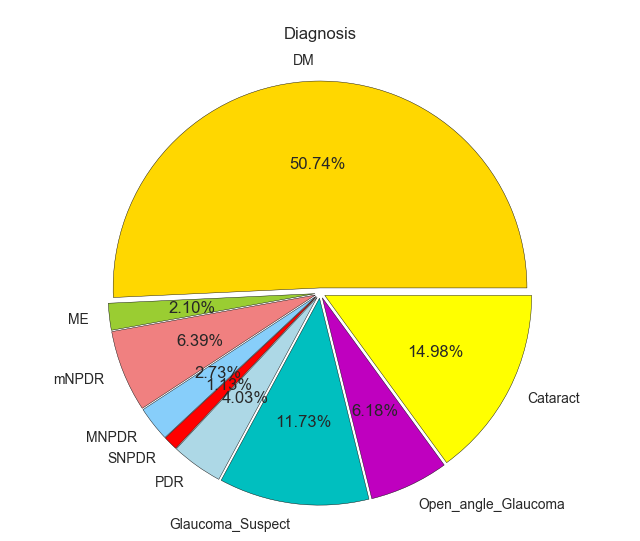

In [17]:
from pylab import *
labels = "DM","ME","mNPDR","MNPDR","SNPDR","PDR","Glaucoma_Suspect","Open_angle_Glaucoma","Cataract"
fracs = [a[0],a[1],a[2],a[3],a[4],a[5],a[6],a[7],a[8]]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','r','lightblue','c','m','yellow']
explode = (0.025, 0.025, 0.025, 0.025,0.025,0.025,0.025,0.025,0.025)  # explode 1st slice
pie(fracs, labels=labels,bar,colors=colors,explode=explode)
plt.axis('equal')
title('\nDiagnosis\n\n')
show()

In [24]:
sp3=sp1.copy()

In [25]:
 diagnoses = {
            # Macular edema is under 362.07 for ICD9 and E(08|09|10|11|13).3([1-5]1|7) for ICD10
            "ME" : "^362\.07|^E(?:0[89]|1[013])\.3(?:[1-5]1|7).*",
            # Mild Nonproliferative Diabetic Retinopathy is under 362.04 for ICD9 and E(08|09|10|11|13).32
            # Background/unspecified DR is considered as mNPDR as suggested (362.01 for ICD9, E(08|09|10|11|13).31 for ICD10)
            "mNPDR" : "^362\.0(4|1)|^E(?:0[89]|1[013])\.3(2|1).*",
            # Moderate Nonproliferative Diabetic Retinopathy is under 362.05 for ICD9 and E(08|09|10|11|13).33
            "MNPDR" : "^362\.05|^E(?:0[89]|1[013])\.33.*",
            # Severe Nonproliferative Diabetic Retinopathy is under 362.06 for ICD9 and E(08|09|10|11|13).34
            "SNPDR" : "^362\.06|^E(?:0[89]|1[013])\.34.*",
            # Proliferative Diabetic Retinopathy is under 362.02 for ICD9 and E(08|09|10|11|13).35
            "PDR" : "^362\.02|^E(?:0[89]|1[013])\.35.*",
            # Glaucoma Suspect:365.0 for ICD9 and H40.0 for ICD10 and Open-angle Glaucoma: 365.1 for ICD9 and H40.1 for ICD10
            "Glaucoma" : "^365\.1.*|^H40\.1.*|^365\.0.*|^H40\.0.*",
            # Cataract is under 366 for ICD9 and H25 and H26 for ICD10
            "Cataract" : "^366(?:\.\d{1,2})?|^H2[56](?:\.[A-Z0-9]{1,4})?"
        }
for diagnosis, pattern in diagnoses.iteritems():
        sp3[diagnosis]=sp3["ICD"].str.contains(pattern)

C:\Users\mom1\Anaconda2\lib\site-packages\ipykernel\__main__.py:19: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.


In [27]:
a1=(sp3[["ME","mNPDR","MNPDR","SNPDR","PDR","Glaucoma","Cataract"]].sum(axis=0))
a1

ME           158
mNPDR        482
MNPDR        206
SNPDR         85
PDR          304
Glaucoma    1350
Cataract    1129
dtype: int64

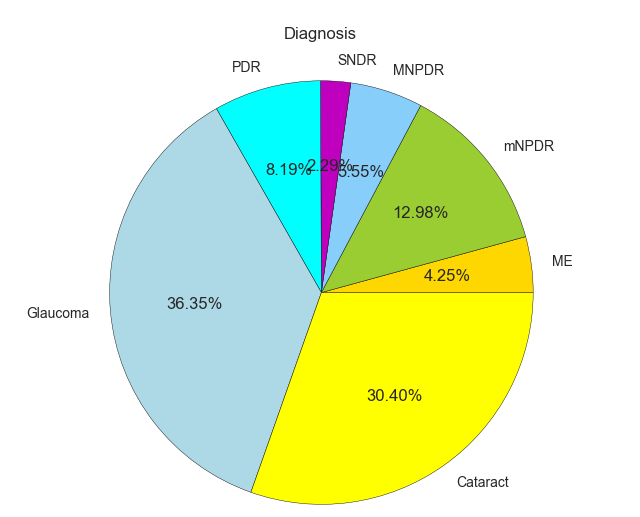

In [31]:
from pylab import *
labels = "ME","mNPDR","MNPDR","SNDR","PDR","Glaucoma","Cataract"
fracs = [a1[0],a1[1],a1[2],a1[3],a1[4],a1[5],a1[6]]
colors = ['gold', 'yellowgreen', 'lightskyblue','m','cyan','lightblue','yellow']
#explode = (0.025, 0.025, 0.025, 0.025,0.025,0.025,0.025)  # explode 1st slice
pie(fracs, labels=labels,autopct='%1.2f%%',colors=colors)
plt.axis('equal')
title('\nDiagnosis\n\n')
show()

In [36]:
target_diagnosis = ['PDR', 'SNPDR', 'MNPDR', 'mNPDR']
def DR(row):
    temp = np.where(row)[0]
    if len(temp)>0:
        return target_diagnosis[temp[0]]
    else:
        return 'no_DR'  
sp3['DR_diagnosis'] = sp3.apply(lambda x: DR(x[target_diagnosis]), axis=1)

In [37]:
sp3['DR_diagnosis_idx'] = sp3['DR_diagnosis'].apply(lambda x: target_diagnosis.index(x) if x!='no_DR' else 4) 

In [38]:
sp3.to_csv("single_person_all4.csv")

In [32]:
#Percent of Null values in quantitative columns
print "Quantitive columns:"
quantitive_columns1 = sp3.select_dtypes(include=[np.number]).columns
print len(quantitive_columns1)
miss_quant_null=sp3[quantitive_columns1].isnull().sum(axis=0)/sp3.shape[0]
print miss_quant_null.sort_values(ascending=False)
#Percent of Null values in qualitative columns
print "Qualititive columns:"
qualitative_columns1 = sp3.select_dtypes(include=[object]).columns
print len(qualitative_columns1)
miss_qual1=sp3[qualitative_columns1].isnull().sum(axis=0)/sp3.shape[0]
miss_qual1.sort_values(ascending=False)

Quantitive columns:
11
Age_group_numeric    0.0
G                    0.0
DM                   0.0
Age                  0.0
BP_Diastolic         0.0
BP_Systolic          0.0
Glucose              0.0
BMI                  0.0
A1C                  0.0
Person_Nbr           0.0
Enc_Nbr              0.0
dtype: float64
Qualititive columns:
23


Age_group             0.0
OS_Macula2_Finding    0.0
Primary_Payer         0.0
ICD                   0.0
OD_Macula1_Finding    0.0
OD_Macula1_Modifer    0.0
OD_Macula2_Finding    0.0
OD_Macula2_Modifer    0.0
OD_Macula3_Finding    0.0
OS_Macula1_Finding    0.0
OS_Macula1_Modifer    0.0
OS_Macula2_Modifer    0.0
Family_History        0.0
OS_Macula3_Finding    0.0
OD_SL_LENS            0.0
OS_SL_LENS            0.0
Enc_Yr_sl             0.0
Zipn                  0.0
Gender                0.0
Racen                 0.0
Relation              0.0
Code                  0.0
Smoking_Status        0.0
dtype: float64

In [33]:
#Percent of Zero values in quantitative columns
miss_quant_zero=sp3[quantitive_columns1][sp3 == 0].count(axis=0)/sp3.shape[0]
miss_quant_zero.sort_values(ascending=False)

Age_group_numeric    0.0
G                    0.0
DM                   0.0
Age                  0.0
BP_Diastolic         0.0
BP_Systolic          0.0
Glucose              0.0
BMI                  0.0
A1C                  0.0
Person_Nbr           0.0
Enc_Nbr              0.0
dtype: float64

In [34]:
quantitive_columns1

Index([u'Enc_Nbr', u'Person_Nbr', u'A1C', u'BMI', u'Glucose', u'BP_Systolic',
       u'BP_Diastolic', u'Age', u'DM', u'G', u'Age_group_numeric'],
      dtype='object')

In [35]:
#Understanding the summary statistics,distributions and the correlations for quantitative columns
qc= quantitive_columns1[2:8]
sp3[qc].describe()

,A1C,BMI,Glucose,BP_Systolic,BP_Diastolic,Age
count,16087.000000,16087.000000,16087.000000,16087.000000,16087.000000,16087.000000
mean,4.771716,20.810540,96.102207,94.671838,55.526609,61.675079
std,1.599397,8.428341,48.256840,40.443929,24.262632,15.260425
min,0.082716,0.467500,4.071429,1.818182,1.212121,2.000000
25%,4.692222,19.792654,67.500000,62.500000,36.000000,53.000000
50%,4.726177,20.879103,95.751198,95.043138,55.666667,62.000000
75%,4.894269,21.205415,109.000000,128.000000,77.000000,72.000000
max,17.000000,82.300000,1200.000000,240.000000,130.000000,115.000000


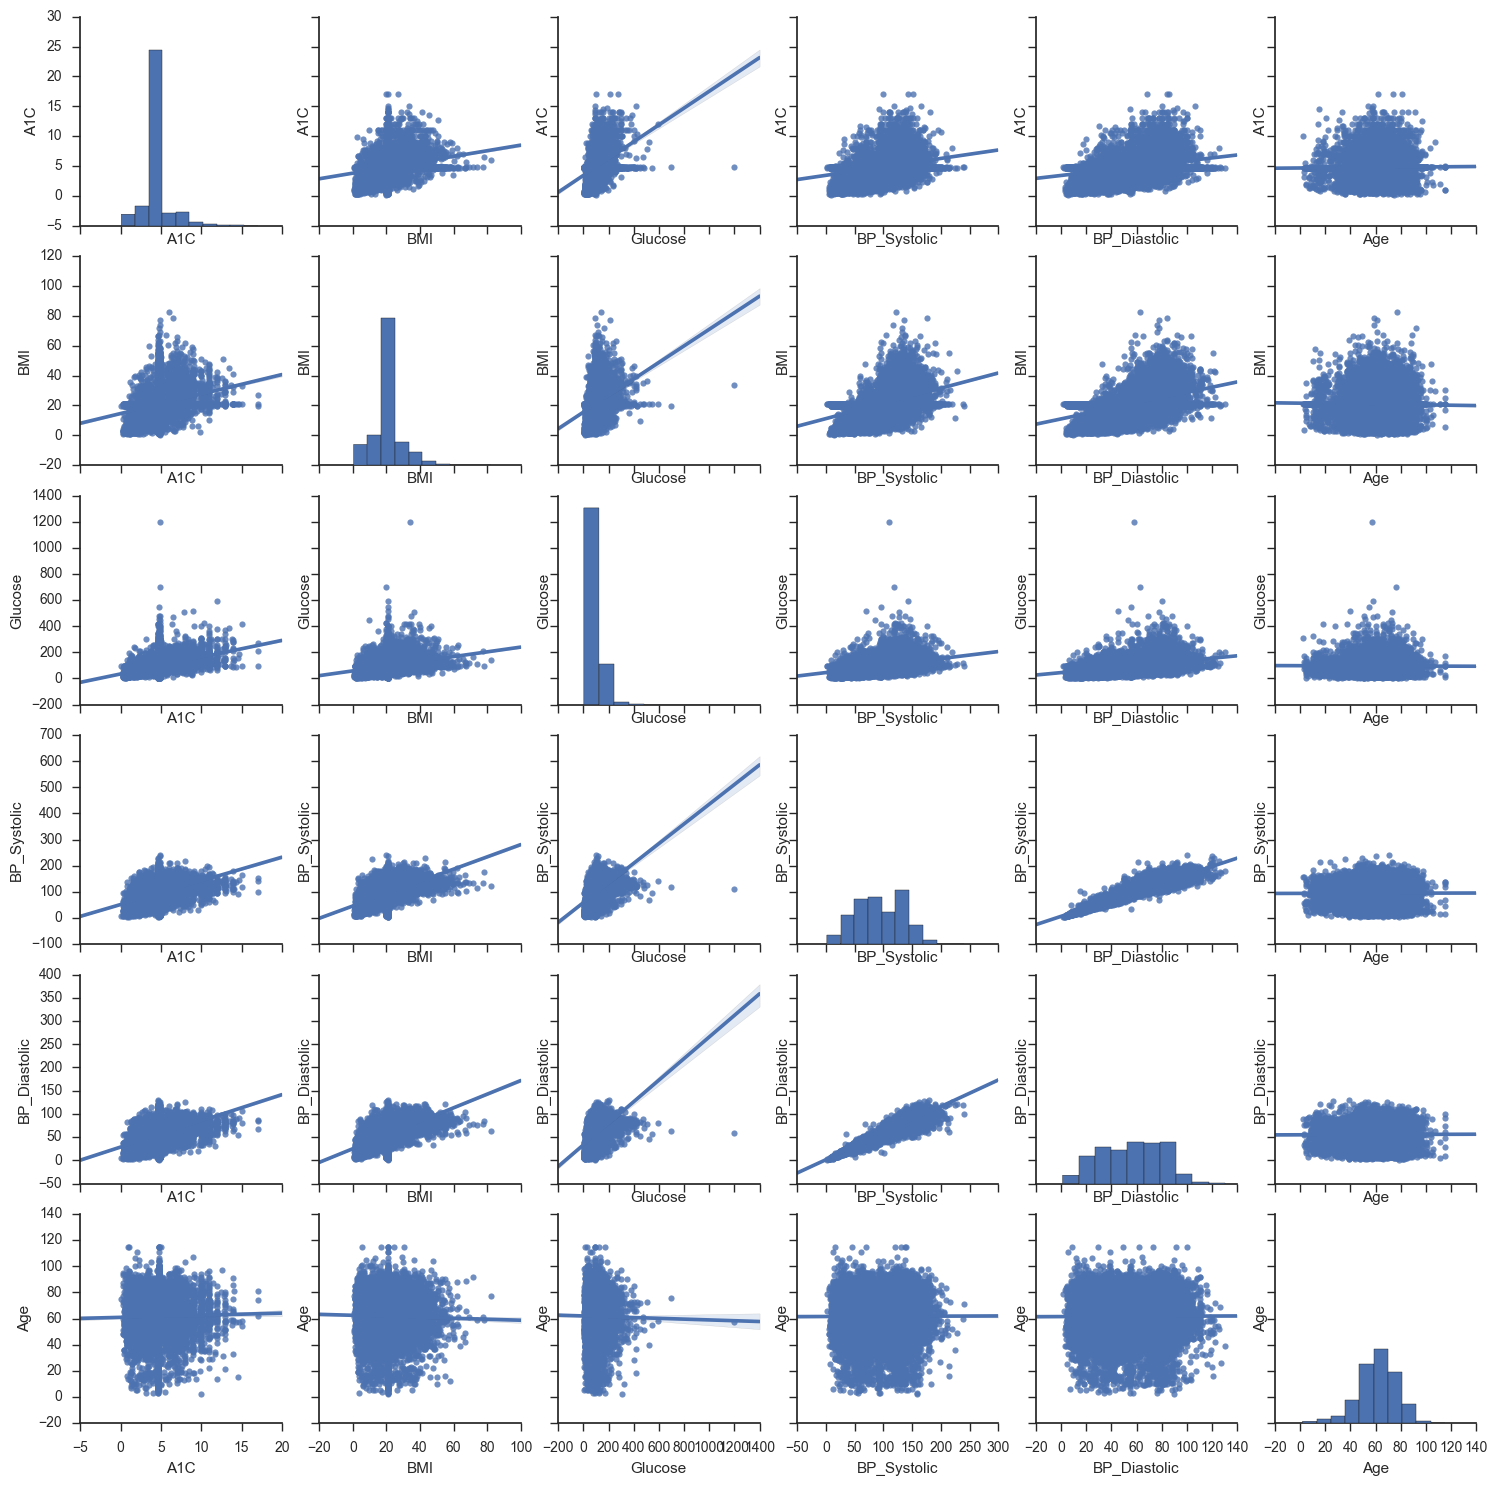

In [14]:
sns.set(style="ticks", color_codes=True)
g = sns.pairplot(sp3[qc],kind="reg")
xlabels,ylabels = [],[]
for ax in g.axes[-1,:]:
    xlabel = ax.xaxis.get_label_text()
    xlabels.append(xlabel)
for ax in g.axes[:,0]:
    ylabel = ax.yaxis.get_label_text()
    ylabels.append(ylabel)
for i in range(len(xlabels)):
    for j in range(len(ylabels)):
        g.axes[j,i].xaxis.set_label_text(xlabels[i])
        g.axes[j,i].yaxis.set_label_text(ylabels[j])
sns.plt.show()

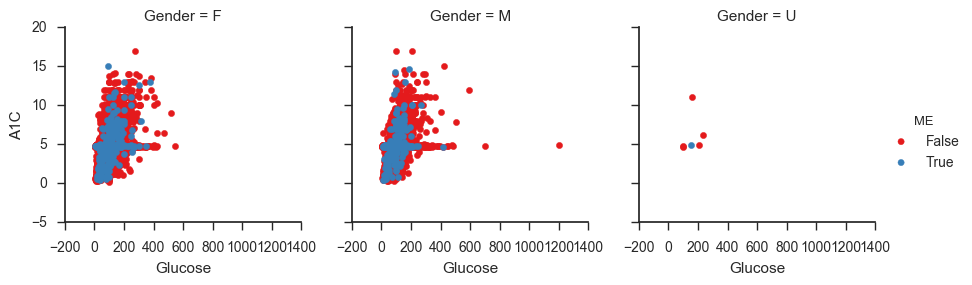

In [37]:
#kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(sp3, col="Gender", hue="ME", palette="Set1")
                   #hue_order=["Dinner", "Lunch"])
g = (g.map(plt.scatter, "Age",'A1C')
      .add_legend())
sns.plt.show()

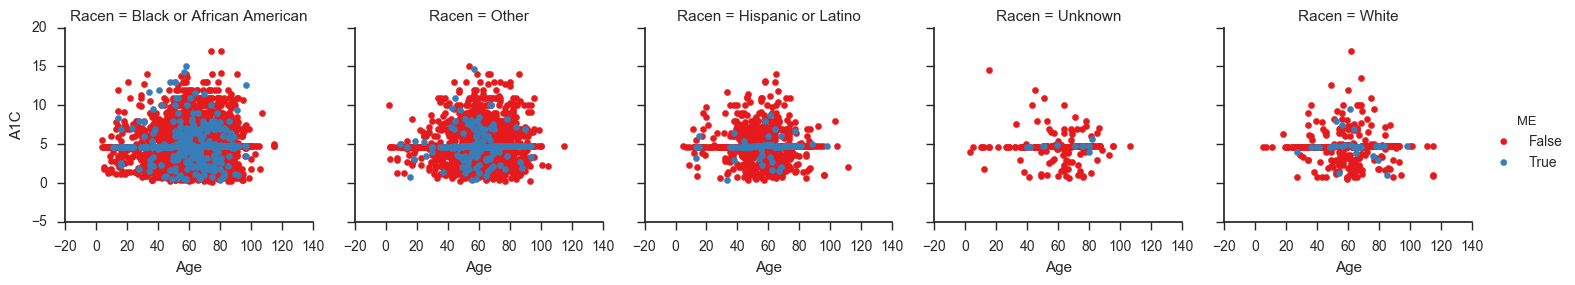

In [36]:
#kws = dict(s=50, linewidth=.5, edgecolor="w")
g = sns.FacetGrid(sp3, col="Racen", hue="ME", palette="Set1")
                   #hue_order=["Dinner", "Lunch"])
g = (g.map(plt.scatter, "Age",'A1C')
      .add_legend())
sns.plt.show()

In [4]:
baseline_missingHandle=pd.read_pickle(interpath+"baseline_missingHandled_Dan_20170406.pickle")
print baseline_missingHandle.shape
print baseline_missingHandle.columns
baseline_missingHandle.head()

(16039, 26)
Index([u'A1C', u'BMI', u'Glucose', u'BP_Diastolic', u'BP_Systolic', u'DM',
       u'ME', u'Glaucoma_Suspect', u'Open_angle_Glaucoma', u'Cataract',
       u'Gender_F', u'Gender_M', u'Gender_U', u'Race_Asian',
       u'Race_Black or African American', u'Race_Hispanic or Latino',
       u'Race_Other', u'Race_White', u'Age_group_(18, 48]',
       u'Age_group_(49, 55]', u'Age_group_(56, 60]', u'Age_group_(61, 66]',
       u'Age_group_(67, 74]', u'Age_group_(75, 114]', u'worst_DR',
       u'recent_DR'],
      dtype='object')


,A1C,BMI,Glucose,BP_Diastolic,BP_Systolic,DM,ME,Glaucoma_Suspect,Open_angle_Glaucoma,Cataract,...,Race_Other,Race_White,"Age_group_(18, 48]","Age_group_(49, 55]","Age_group_(56, 60]","Age_group_(61, 66]","Age_group_(67, 74]","Age_group_(75, 114]",worst_DR,recent_DR
Person_Nbr,,,,,,,,,,,,,,,,,,,,,
33,8.000000,31.579036,130.000000,78.000000,118.000000,True,False,False,False,False,...,0,0,0,0,0,1,0,0,no_DR,no_DR
89,7.280372,32.452934,133.443515,53.000000,92.000000,True,False,True,False,False,...,1,0,0,0,1,0,0,0,no_DR,no_DR
146,6.989072,31.129173,128.568645,75.000000,130.000000,True,False,True,False,True,...,1,0,0,0,0,0,1,0,no_DR,no_DR
196,7.280372,32.452934,78.000000,88.000000,125.000000,False,False,False,False,False,...,1,0,0,0,1,0,0,0,no_DR,no_DR
327,7.203035,31.579036,121.000000,78.082412,134.756106,False,False,True,False,False,...,0,0,0,0,0,1,0,0,no_DR,no_DR


In [5]:
DR_to_vis_dict = {'PDR': 'vision_threatening', 
                  'SNPDR': 'vision_threatening',
                  'MNPDR': 'non_vision_threatening',
                  'mNPDR': 'non_vision_threatening', 
                  'no_DR': 'no_DR'}
baseline_missingHandle['base_recent_vis'] = baseline_missingHandle['recent_DR'].map(lambda x: DR_to_vis_dict[x])

In [9]:
baseline_missingHandle['ME']==True

Person_Nbr
33         False
89         False
146        False
196        False
327        False
331         True
335        False
535        False
567        False
608        False
663        False
777        False
844        False
863         True
1014       False
1120       False
1121       False
1124       False
1138        True
1218       False
1289       False
1426       False
1440       False
1515       False
1519       False
1600       False
1614       False
1628       False
1631       False
1670       False
           ...  
1046570    False
1046738    False
1046771    False
1046775    False
1046908    False
1046928    False
1046993    False
1047195    False
1047196    False
1047283    False
1047333    False
1047496     True
1047546    False
1047594    False
1047666    False
1047729    False
1047757    False
1047764    False
1047766    False
1047864    False
1047882    False
1048232    False
1048271    False
1048306    False
1048369    False
1048373    False
1048376    False
104

In [17]:
baseline_missingHandle['recent_DR']=='no_DR'

Person_Nbr
33          True
89          True
146         True
196         True
327         True
331        False
335         True
535        False
567        False
608         True
663         True
777         True
844        False
863        False
1014        True
1120        True
1121        True
1124        True
1138       False
1218       False
1289        True
1426       False
1440       False
1515        True
1519       False
1600        True
1614        True
1628        True
1631        True
1670       False
           ...  
1046570     True
1046738    False
1046771     True
1046775    False
1046908     True
1046928     True
1046993     True
1047195     True
1047196     True
1047283     True
1047333     True
1047496    False
1047546     True
1047594     True
1047666     True
1047729     True
1047757     True
1047764     True
1047766     True
1047864     True
1047882     True
1048232     True
1048271     True
1048306     True
1048369     True
1048373     True
1048376     True
104

In [30]:
count=0
for index,row in baseline_missingHandle.iterrows():
    if ((row['ME']==True) and (row['base_recent_vis']=='no_DR')):
        count=count+1
    else:
        pass

In [31]:
count

96

In [32]:
count=0
for index,row in baseline_missingHandle.iterrows():
    if ((row['ME']==True) and (row['base_recent_vis']=='vision_threatening')):
        count=count+1
    else:
        pass
count

419

In [33]:
count=0
for index,row in baseline_missingHandle.iterrows():
    if ((row['ME']==True) and (row['base_recent_vis']=='non_vision_threatening')):
        count=count+1
    else:
        pass
count

503

In [11]:
a1=(sp3[["no_DR","vision_threatening","non_vision_threatening"]].sum(axis=0))
a1

NameError: name 'sp3' is not defined